In [71]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [61]:
parse_dates = ["start", "end"]
df_data = pd.read_csv("../data_preprocessed/df_data.csv", parse_dates=parse_dates)
df_data["start_hour"] = df_data["start"].dt.hour
df_data["travel_duration"] = (df_data["end"] - df_data["start"]).dt.total_seconds()//60
df_data.drop(df_data[df_data["travel_duration"] < 0].index, inplace=True)  # remove negative travel durations
df_data["line_category"] = df_data["line"].astype("category").cat.codes
df_data_feat_eng = df_data.drop(["start", "end", "line", "latest_res_dt"], axis=1)
df_data_feat_eng

,capacity,lat_from,lon_from,lat_to,lon_to,book_in_advance,day_of_week,week,year,start_hour,travel_duration,line_category
0,15.0,47.378177,8.540212,47.547412,7.589563,0.0,6,11,2021,6,53.0,3
1,9.0,47.378177,8.540212,47.547412,7.589563,0.0,4,12,2021,6,53.0,3
2,9.0,47.378177,8.540212,47.547412,7.589563,0.0,5,17,2021,6,53.0,3
3,9.0,47.378177,8.540212,47.547412,7.589563,0.0,5,18,2021,6,53.0,3
4,13.0,47.378177,8.540212,47.547412,7.589563,0.0,6,21,2021,6,53.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
115744,12.0,46.754853,7.629606,46.873354,7.559442,0.0,4,23,2021,5,10.0,6
115745,15.0,46.294029,7.881465,46.588908,7.651418,0.0,4,33,2021,5,15.0,7
115746,9.0,46.294029,7.881465,46.588908,7.651418,0.0,5,33,2021,5,18.0,7
115747,9.0,46.294029,7.881465,46.588908,7.651418,0.0,4,35,2021,5,15.0,7


In [92]:
dict(enumerate(df_data['line'].astype("category").cat.categories))

{0: 'Div',
 1: 'IC 1',
 2: 'IC 2/21',
 3: 'IC 3',
 4: 'IC 5',
 5: 'IC 51',
 6: 'IC 6/61',
 7: 'IC 8'}

In [62]:
df_data_feat_eng.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity,115747.0,12.560758,7.052237,2.000000,8.000000,12.000000,15.000000,44.000000
lat_from,115747.0,47.039384,0.384926,45.832168,46.853084,47.132898,47.378177,47.566224
lon_from,115747.0,7.859348,0.811099,6.111986,7.242911,7.709870,8.540212,9.554045
lat_to,115747.0,47.030353,0.398012,45.832168,46.781545,47.132898,47.378177,47.566224
lon_to,115747.0,7.877219,0.832588,6.111986,7.350063,7.869000,8.540212,9.554045
book_in_advance,115747.0,69.139105,1142.976810,0.000000,0.000000,0.000000,0.000000,88444.000000
day_of_week,115747.0,4.056848,1.823398,0.000000,3.000000,4.000000,5.000000,6.000000
week,115747.0,27.652345,8.220268,11.000000,21.000000,28.000000,34.000000,43.000000
year,115747.0,2021.000000,0.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
start_hour,115747.0,13.554407,4.367107,0.000000,10.000000,14.000000,17.000000,23.000000


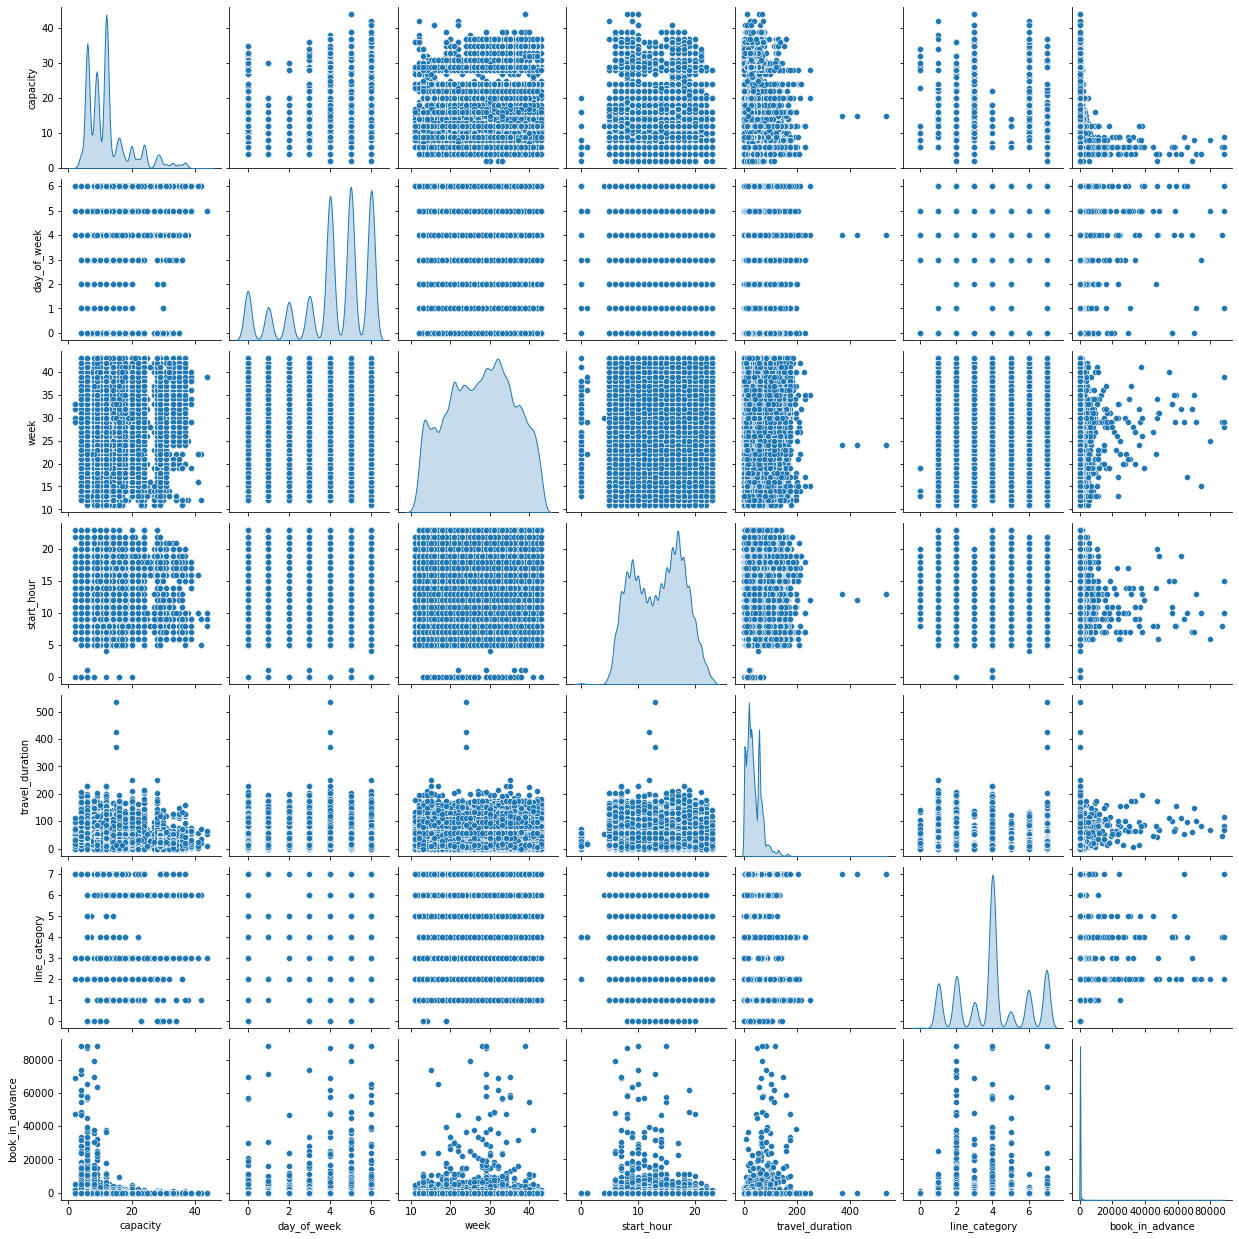

In [63]:
sns.pairplot(df_data_feat_eng[['capacity', 'day_of_week', 'week', 'start_hour', 'travel_duration', 'line_category', 'book_in_advance']], diag_kind="kde")

In [131]:
df_X = df_data_feat_eng.drop(["book_in_advance", "year"], axis=1)
df_Y = df_data_feat_eng["book_in_advance"]
display(df_X.head(5))
display(df_Y.head(5))

,capacity,lat_from,lon_from,lat_to,lon_to,day_of_week,week,start_hour,travel_duration,line_category
0,15.0,47.378177,8.540212,47.547412,7.589563,6,11,6,53.0,3
1,9.0,47.378177,8.540212,47.547412,7.589563,4,12,6,53.0,3
2,9.0,47.378177,8.540212,47.547412,7.589563,5,17,6,53.0,3
3,9.0,47.378177,8.540212,47.547412,7.589563,5,18,6,53.0,3
4,13.0,47.378177,8.540212,47.547412,7.589563,6,21,6,53.0,3


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: book_in_advance, dtype: float64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=123)


In [127]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
#Prediction using test set 
y_pred = ridge.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.003596196031373622
MAE:  146.25887428940698
MSE:  1601566.8012925421


In [93]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100 ,  random_state=123)
rf_regressor.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -0.07276345497482906
MAE:  136.3938515398994
MSE:  1724303.267695745


In [130]:
from xgboost import XGBRegressor

rf_regressor = XGBRegressor(n_estimators=10, max_depth=5, learning_rate=0.01)
rf_regressor.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -0.00029246886979339415
MAE:  78.20606070571017
MSE:  1607817.2356869662


In [124]:
import numpy as np
index_with_zero_wait_time = y_test[y_test == 0.0].reset_index().index
zero_wait_time = y_pred[index_with_zero_wait_time] - y_test[y_test == 0.0]
print(np.mean(zero_wait_time))
print(len(zero_wait_time))
wait_time_predictions = np.delete(y_pred, index_with_zero_wait_time) - y_test[y_test != 0.0]
print(np.mean(wait_time_predictions))
print(len(wait_time_predictions))

6.755761479134568
22291
-1953.642358203567
859


In [106]:
y_pred

array([ 77.25013 ,  19.834293,  31.38353 , ...,  31.38353 ,  88.21753 ,
       256.0214  ], dtype=float32)